In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from gaussian_sampling import plot_sample_hist
from residue_sampling import *
from simple_harmonic_motion import plot_oscillator

Exercise 1

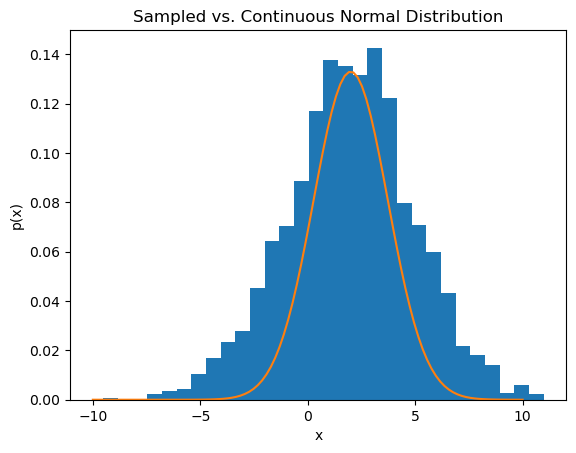

In [3]:
hist = plot_sample_hist(2000, 2, 3, 10, save=True, out_file="../../data/normalHist.png")

Exercise 2

In [5]:
uniform_sequence = ''.join(uniform_sampling(300))
uniform_sequence

'WDKLPEHSWCHDSFWPQTTADHFQIWIEPFTVWWVCPHNMPSYMTRPFTRDYYQKNADGIAGYLLDKNMYCQLVCQGPNCQAEITVTTYLYWVTCQTNYTRKNDTQCIFQHCESQTPTWSNPRQVKEFKHNNMHPQFAQNKHIQVCWEYAANSCQHDKKGKLNMYCPAAVHVYARWWPVRSQAMYEACLMCLSIAVNIHGGFYHNMGLLHYRGSDYEMQNQPNEQVIKTHIRMSQSGQFEQDERWEQRAIWPDRHECSAAKRGEEHVWSHYVWSLKEWTRGVLNRYWHMGHNTHNCENMY'

In [7]:
# calculate the frequencies of each amino acid in the above sequence
freqs = {}
for amino_acid in amino_acid_keys.values():
    freqs[amino_acid] = uniform_sequence.count(amino_acid) / 300
print("Frequency of AA In Uniform Distribution")
print(freqs)

Frequency of AA In Uniform Distribution
{'A': 0.05333333333333334, 'R': 0.04666666666666667, 'N': 0.06666666666666667, 'D': 0.03666666666666667, 'C': 0.05, 'Q': 0.07666666666666666, 'E': 0.056666666666666664, 'G': 0.04, 'H': 0.06666666666666667, 'I': 0.03666666666666667, 'L': 0.04, 'K': 0.043333333333333335, 'M': 0.04, 'F': 0.03, 'P': 0.04666666666666667, 'S': 0.04666666666666667, 'T': 0.056666666666666664, 'W': 0.056666666666666664, 'Y': 0.06, 'V': 0.05}


In [9]:
# sampling from the uniprot frequency data
actualSequence = ''.join(swiss_prot_sampling(300))
actualSequence

'ANGTYSVCSQQHGPDALFNEEANREQYHEAAREAIQIVNGVRKRERTTEGYFKSETVGRQLTVKAQLNIGANCIKHPAETSKTKDTMLNVIVLVAHSNVGSIFPVVLHISEINMHGLDLPLPFLDPSIYQGLQVDFWVATVLTQYDYNLWNSTRIDVADSVDVVMRQISRCSGMMVKHWKEPYLSPQLHQGSKIEVEFLMDPLQHSPEIFDEYHLRGVDQAGLNHPARILPRKYLSHMQEIIVLEQGHLTEAAQLAELAIKEVKSYKVDAWALWLKLNGNFLFISLLPEVGPQELFNFHQ'

In [10]:
freqs = {}
for amino_acid in amino_acid_scale_values.keys():
    freqs[amino_acid] = actualSequence.count(amino_acid) / 300
print("Frequency of AA Sampled from SwissProtKB Database")
print(freqs)

Frequency of AA Sampled from SwissProtKB Database
{'A': 0.06666666666666667, 'R': 0.04, 'N': 0.05, 'D': 0.043333333333333335, 'C': 0.01, 'Q': 0.06333333333333334, 'E': 0.07333333333333333, 'G': 0.05333333333333334, 'H': 0.04666666666666667, 'I': 0.06, 'L': 0.10666666666666667, 'K': 0.04666666666666667, 'M': 0.023333333333333334, 'F': 0.03666666666666667, 'P': 0.04666666666666667, 'S': 0.06, 'T': 0.04, 'W': 0.016666666666666666, 'Y': 0.03333333333333333, 'V': 0.08333333333333333}


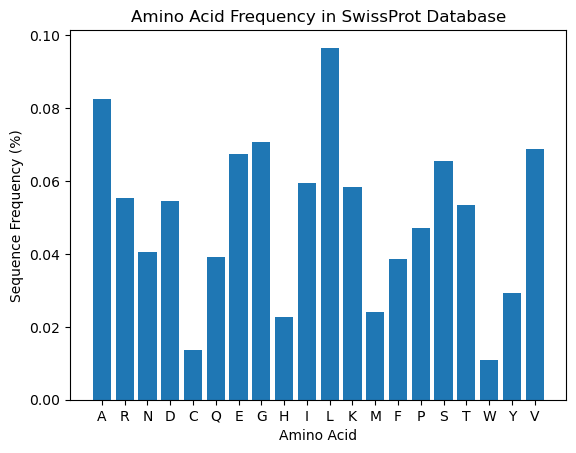

In [11]:
fig, ax = plt.subplots()
ax.bar(amino_acid_scale_values.keys(), [a / 100 for a in amino_acid_scale_values.values()])
plt.title("Amino Acid Frequency in SwissProt Database")
plt.xlabel("Amino Acid")
plt.ylabel("Sequence Frequency (%)")
plt.savefig("../../data/swissAAFreq.png")

Exercise 5

<Axes: title={'center': 'Position, Velocity, and Force \n Over Time for the Simple Bond Oscillation'}, xlabel='time (s)'>

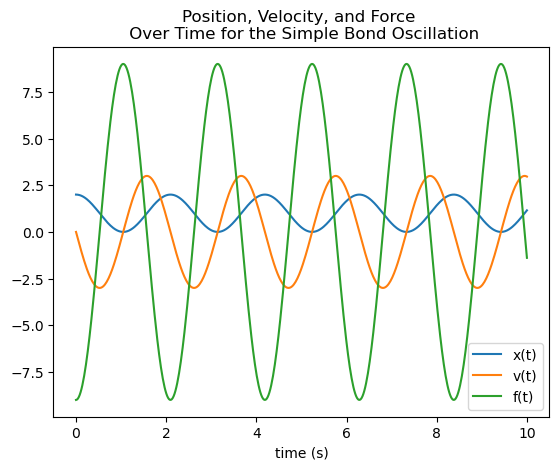

In [12]:
x_0 = 1
w = 3
m = 1
range = 10

plot_oscillator(range, w, x_0, m, save_file=True, save_location="../../data/oscillator.png")